# Lab: Clustering Algorithms with Scikit Learn
<img src="IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

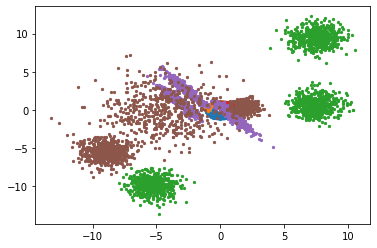

In [3]:
plt.scatter(A[:, 0], A[:, 1], s=5);
plt.scatter(B[:, 0], B[:, 1], s=5);
plt.scatter(C[:, 0], C[:, 1], s=5);
plt.scatter(D[:, 0], D[:, 1], s=5);
plt.scatter(E[:, 0], E[:, 1], s=5);
plt.scatter(F[:, 0], F[:, 1], s=5);

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

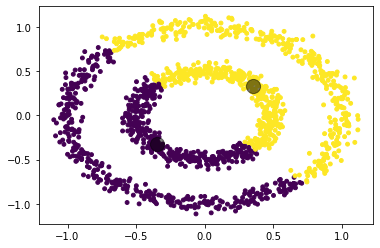

In [26]:
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(A)
akmeans = kmeans.predict(A)

plt.scatter(A[:, 0], A[:, 1], c=akmeans, s=15)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

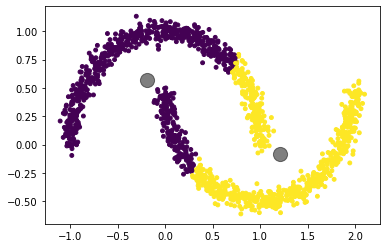

In [5]:
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(B)
bkmeans = kmeans.predict(B)

plt.scatter(B[:, 0], B[:, 1], c=bkmeans, s=15)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

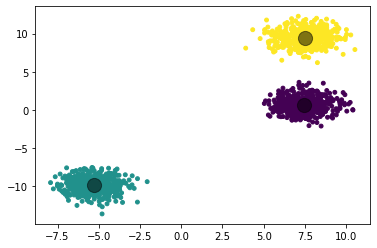

In [6]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(C)
ckmeans = kmeans.predict(C)

plt.scatter(C[:, 0], C[:, 1], c=ckmeans, s=15)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

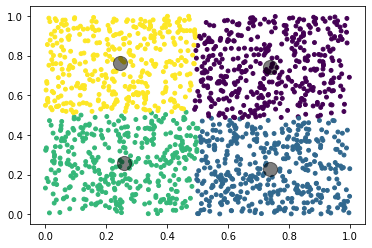

In [7]:
kmeans = KMeans(n_clusters=4,init='k-means++')
kmeans.fit(D)
dkmeans = kmeans.predict(D)

plt.scatter(D[:, 0], D[:, 1], c=dkmeans, s=15)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

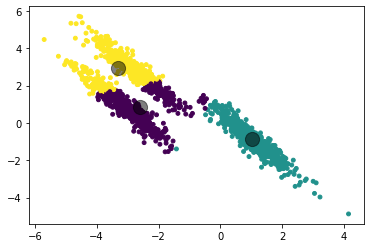

In [8]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(E)
ekmeans = kmeans.predict(E)

plt.scatter(E[:, 0], E[:, 1], c=ekmeans, s=15)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

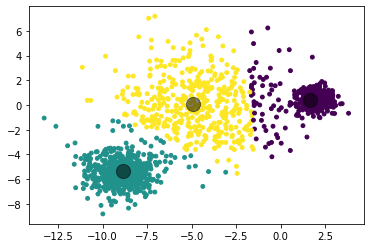

In [9]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(F)
kmeans.__init__()
fkmeans = kmeans.predict(F)

plt.scatter(F[:, 0], F[:, 1], c=fkmeans, s=15)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

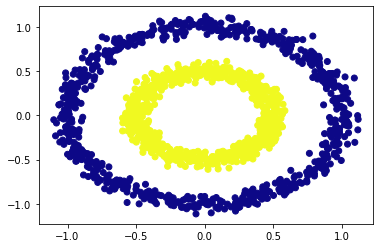

In [10]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

dbscanA = DBSCAN(eps=0.3, min_samples = 2)
Aclusters = dbscanA.fit_predict(A_scaled)
plt.scatter(A[:, 0], A[:, 1], c=Aclusters, cmap="plasma")

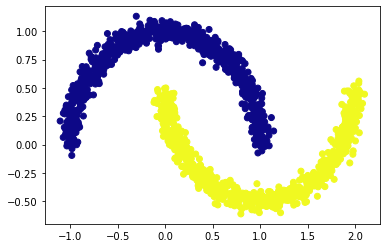

In [11]:
B_scaled = scaler.fit_transform(B)

dbscanB = DBSCAN(eps=0.5, min_samples = 2)
Bclusters = dbscanB.fit_predict(B_scaled)
plt.scatter(B[:, 0], B[:, 1], c=Bclusters, cmap="plasma")

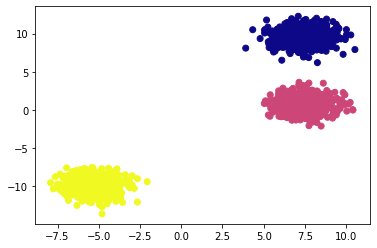

In [12]:
C_scaled = scaler.fit_transform(C)

dbscanC = DBSCAN(eps=0.3, min_samples = 2)
Cclusters = dbscanC.fit_predict(C_scaled)
plt.scatter(C[:, 0], C[:, 1], c=Cclusters, cmap="plasma")

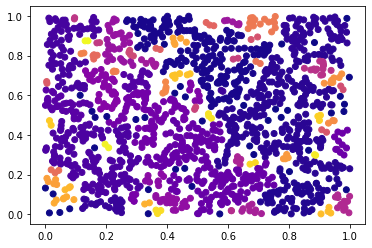

In [13]:
D_scaled = scaler.fit_transform(D)

dbscanD = DBSCAN(eps=0.1, min_samples = 2)
Dclusters = dbscanD.fit_predict(D_scaled)
plt.scatter(D[:, 0], D[:, 1], c=Dclusters, cmap="plasma")

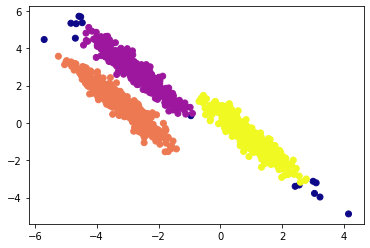

In [14]:
E_scaled = scaler.fit_transform(E)
dbscan = DBSCAN(eps=0.2, min_samples = 8)
Eclusters = dbscan.fit_predict(E_scaled)
plt.scatter(E[:, 0], E[:, 1], c=Eclusters, cmap="plasma")


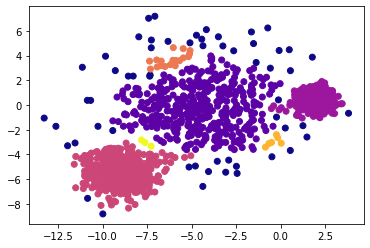

In [18]:
F_scaled = scaler.fit_transform(F)
dbscan = DBSCAN(eps=0.15, min_samples = 3)
Fclusters = dbscan.fit_predict(F_scaled)
plt.scatter(F[:, 0], F[:, 1], c=Fclusters, cmap="plasma")


## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [27]:
from sklearn.metrics import silhouette_score 
print (f'A:K-Means: {silhouette_score(A, akmeans)}')
print (f'A:DBSCAN: {silhouette_score(A, Aclusters)}')
print ("\n"+10*"-"+"\n")
print (f'A:K-Means: {silhouette_score(B, bkmeans)}')
print (f'A:DBSCAN: {silhouette_score(B, Bclusters)}')
print ("\n"+10*"-"+"\n")
print (f'A:K-Means: {silhouette_score(C, ckmeans)}')
print (f'A:DBSCAN: {silhouette_score(C, Cclusters)}')
print ("\n"+10*"-"+"\n")
print (f'A:K-Means: {silhouette_score(D, dkmeans)}')
print (f'A:DBSCAN: {silhouette_score(D, Dclusters)}')
print ("\n"+10*"-"+"\n")
print (f'A:K-Means: {silhouette_score(E, ekmeans)}')
print (f'A:DBSCAN: {silhouette_score(E, Eclusters)}')
print ("\n"+10*"-"+"\n")
print (f'A:K-Means: {silhouette_score(F, fkmeans)}')
print (f'A:DBSCAN: {silhouette_score(F, Fclusters)}')
print ("\n"+10*"-"+"\n")

A:K-Means: 0.35293840049473707
A:DBSCAN: 0.11495233260537135

----------

A:K-Means: 0.4934435202307289
A:DBSCAN: 0.3335826645201586

----------

A:K-Means: 0.8290743874701529
A:DBSCAN: 0.8290743874701529

----------

A:K-Means: 0.40650983924982564
A:DBSCAN: -0.24930142795595528

----------

A:K-Means: 0.5091940404758665
A:DBSCAN: 0.47525962763090973

----------

A:K-Means: 0.646798946148098
A:DBSCAN: 0.3418462449173957

----------

